In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os

In [24]:
# Set dataset directory
train_dir = 'REal_data/train'
val_dir = 'REal_data/validation'

# Preprocess data using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical'
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")



Found 1963 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.5491 - loss: 0.9435 - val_accuracy: 0.6080 - val_loss: 0.8436
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.7319 - loss: 0.5892 - val_accuracy: 0.6975 - val_loss: 0.6622
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7710 - loss: 0.5117 - val_accuracy: 0.6235 - val_loss: 0.7983
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.7896 - loss: 0.4897 - val_accuracy: 0.6142 - val_loss: 0.9161
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.8025 - loss: 0.4640 - val_accuracy: 0.7469 - val_loss: 0.5469
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.8534 - loss: 0.3565 - val_accuracy: 0.8148 - val_loss: 0.4580
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.8631 - loss: 0.3284 - val_accuracy: 0.8056 - val_loss: 0.4554
Epoch 8/10
31/31 ━━━━

In [ ]:
# Function to detect image
def detect_image(model, img_path, class_indices):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class], predictions[0]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


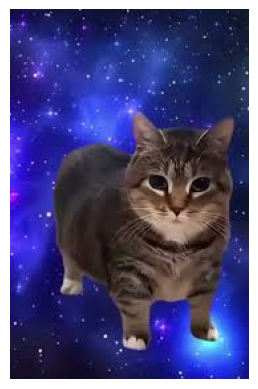

Detected Class: Kucing
Probabilities: [0.02826254 0.27060568 0.70113176]


In [90]:
image_path = 'Succes/Kucing.jpeg'
class_name, probabilities = detect_image(model, image_path, train_generator.class_indices)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hilangkan sumbu koordinat
plt.show()
print(f"Detected Class: {class_name}")
print(f"Probabilities: {probabilities}")

In [ ]:
def detect(image_path):
    # image_path = 'image.png'
    class_name, probabilities = detect_image(model, image_path, train_generator.class_indices)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hilangkan sumbu koordinat
    plt.show()
    print(f"Detected Class: {class_name}")
    print(f"Probabilities: {probabilities}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


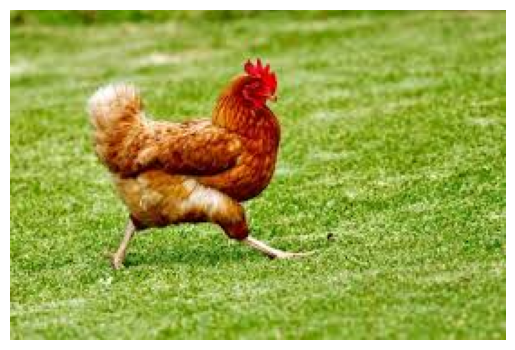

Detected Class: Ayam
Probabilities: [9.9205548e-01 7.5417957e-03 4.0263953e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


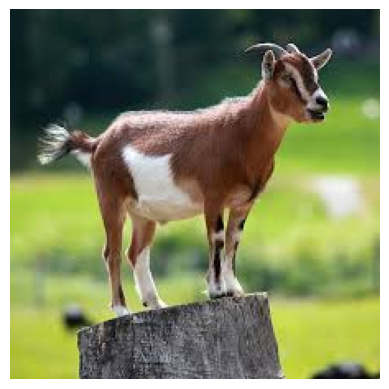

Detected Class: Kambing
Probabilities: [0.00659849 0.9751913  0.0182102 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


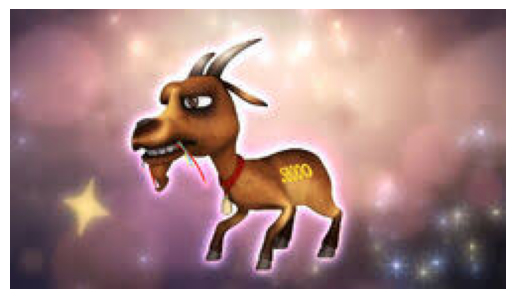

Detected Class: Kambing
Probabilities: [0.00133697 0.59043866 0.4082244 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


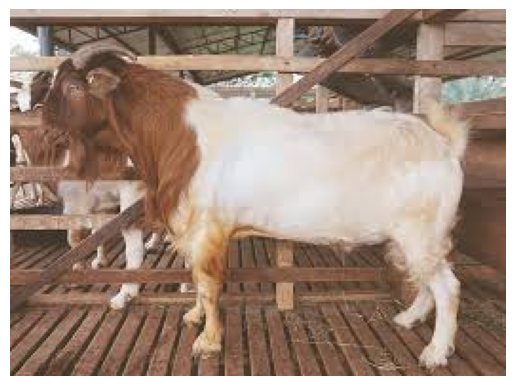

Detected Class: Kambing
Probabilities: [0.00202935 0.5269545  0.47101626]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


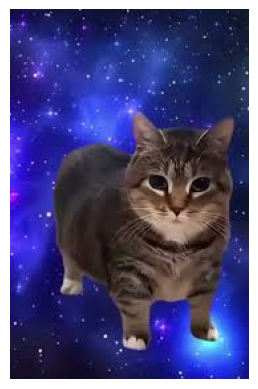

Detected Class: Kucing
Probabilities: [0.02826254 0.27060568 0.70113176]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


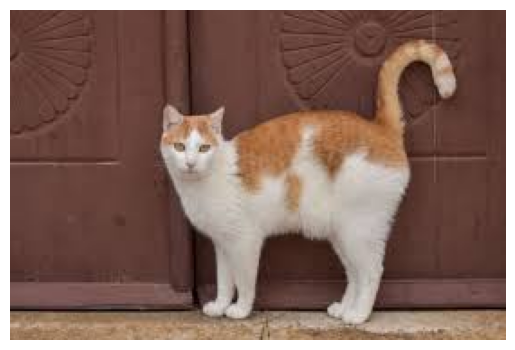

Detected Class: Kucing
Probabilities: [7.1338384e-04 1.0811739e-01 8.9116925e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


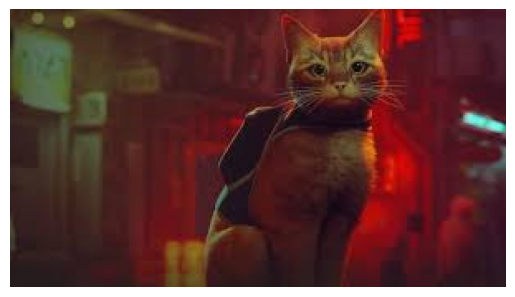

Detected Class: Kucing
Probabilities: [0.02125154 0.26163498 0.7171135 ]


In [ ]:
folder_path = "Succes"
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for file_name in file_names:
    path = f'{folder_path}/{file_name}'
    detect(path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


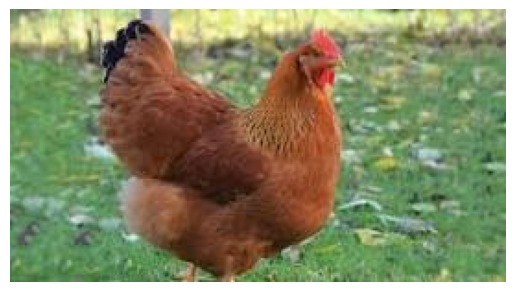

Detected Class: Kambing
Probabilities: [0.30241114 0.4987367  0.19885218]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


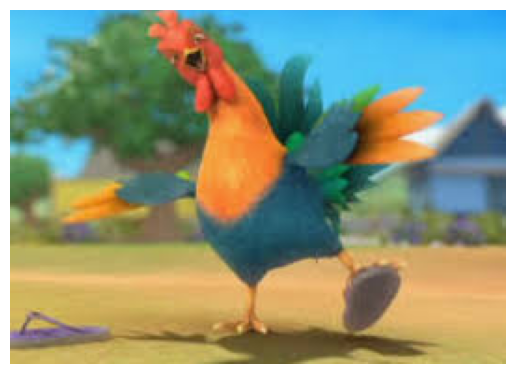

Detected Class: Kucing
Probabilities: [0.05488225 0.12678711 0.8183307 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


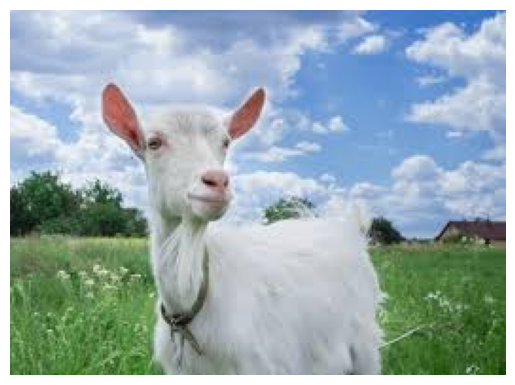

Detected Class: Ayam
Probabilities: [0.91712636 0.06003103 0.0228426 ]


In [91]:
folder_path = "Fail"
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for file_name in file_names:
    path = f'{folder_path}/{file_name}'
    detect(path)
